In [ ]:
# ✅ STEP 1: Imports
import pandas as pd
import numpy as np
from sklearn.model_selection impor₹t train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# ✅ STEP 2: Load dataset
file_path = '/content/dataset.csv'  # change if needed
data = pd.read_csv(file_path)

# Separate features and labels
X = data.iloc[:, :-3]
y = data.iloc[:, -3:]

# ✅ STEP 3: Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ STEP 4: Train/Val/Test Split (70/20/10)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)

print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")

# ✅ STEP 5: Build Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(3, activation='sigmoid')  # 3 output neurons for multi-label classification
])

# ✅ STEP 6: Compile
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

# ✅ STEP 7: Train
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)

# ✅ STEP 8: Evaluate on test set
y_pred = (model.predict(X_test) > 0.5).astype(int)
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=['Vertigo', 'Migraine', 'PPPD']))

# ✅ Optional: Save your model
model.save('/content/pppd_vertigo_migraine_model.keras')

print("✅ Model training complete and saved!")


Train: (2450, 15), Val: (700, 15), Test: (350, 15)
Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.3820 - auc: 0.6164 - loss: 0.6530 - val_accuracy: 0.5514 - val_auc: 0.9026 - val_loss: 0.4186
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5925 - auc: 0.9047 - loss: 0.3894 - val_accuracy: 0.6429 - val_auc: 0.9243 - val_loss: 0.3231
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6357 - auc: 0.9200 - loss: 0.3394 - val_accuracy: 0.6814 - val_auc: 0.9268 - val_loss: 0.3074
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6444 - auc: 0.9301 - loss: 0.3122 - val_accuracy: 0.6286 - val_auc: 0.9266 - val_loss: 0.2994
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6321 - auc: 0.9363 - loss: 0.2938 - val_accuracy: 0.6457 - val_auc: 0.9279 - val_loss: 0.2964
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6500 - auc: 0.9374 - loss: 0.2904 - val_accuracy: 0.6371 - val_auc: 0.9261 - val_loss: 0.2974
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [2]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Flatten labels for multi-label evaluation
y_true_flat = y_test.values.flatten()
y_pred_flat = y_pred.flatten()

# Calculate metrics
f1 = f1_score(y_true_flat, y_pred_flat, average='weighted')
precision = precision_score(y_true_flat, y_pred_flat, average='weighted')
recall = recall_score(y_true_flat, y_pred_flat, average='weighted')
accuracy = accuracy_score(y_true_flat, y_pred_flat)

# Print neatly
print("=== Overall Result ===")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Accuracy: {accuracy:.4f}")


=== Overall Result ===
F1 Score: 0.8438
Precision: 0.8560
Recall: 0.8419
Accuracy: 0.8419


In [3]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,451 (146.30 KB)

 Trainable params: 12,483 (48.76 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 24,968 (97.54 KB)

In [4]:
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train.values)
model.fit(X_train, y_train, validation_data=(X_val, y_val),
          epochs=50, batch_size=32, sample_weight=sample_weights)


Epoch 1/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6388 - auc: 0.9581 - loss: 0.2430 - val_accuracy: 0.5914 - val_auc: 0.9238 - val_loss: 0.3081
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6234 - auc: 0.9584 - loss: 0.2359 - val_accuracy: 0.5771 - val_auc: 0.9252 - val_loss: 0.3031
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6365 - auc: 0.9566 - loss: 0.2441 - val_accuracy: 0.5829 - val_auc: 0.9258 - val_loss: 0.3114
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6136 - auc: 0.9554 - loss: 0.2468 - val_accuracy: 0.5914 - val_auc: 0.9255 - val_loss: 0.3085
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6443 - auc: 0.9530 - loss: 0.2546 - val_accuracy: 0.5743 - val_auc: 0.9256 - val_loss: 0.3167
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6031 - auc: 0.9567 - loss: 0.2415 - val_accuracy: 0.5857 - val_auc: 0.9247 - val_loss: 0.3096
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - 

In [5]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(3, activation='sigmoid')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
lr_schedule = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)


In [7]:
print(classification_report(y_test, y_pred, target_names=['Vertigo', 'Migraine', 'PPPD']))


              precision    recall  f1-score   support

     Vertigo       0.95      0.84      0.89       109
    Migraine       0.74      0.88      0.80       171
        PPPD       0.65      0.96      0.77       125

   micro avg       0.75      0.90      0.81       405
   macro avg       0.78      0.90      0.82       405
weighted avg       0.77      0.90      0.82       405
 samples avg       0.53      0.62      0.55       405



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
probs = model.predict(X_test)
thresholds = [0.5, 0.55, 0.6]  # Example per-label
y_pred_custom = (probs > thresholds).astype(int)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


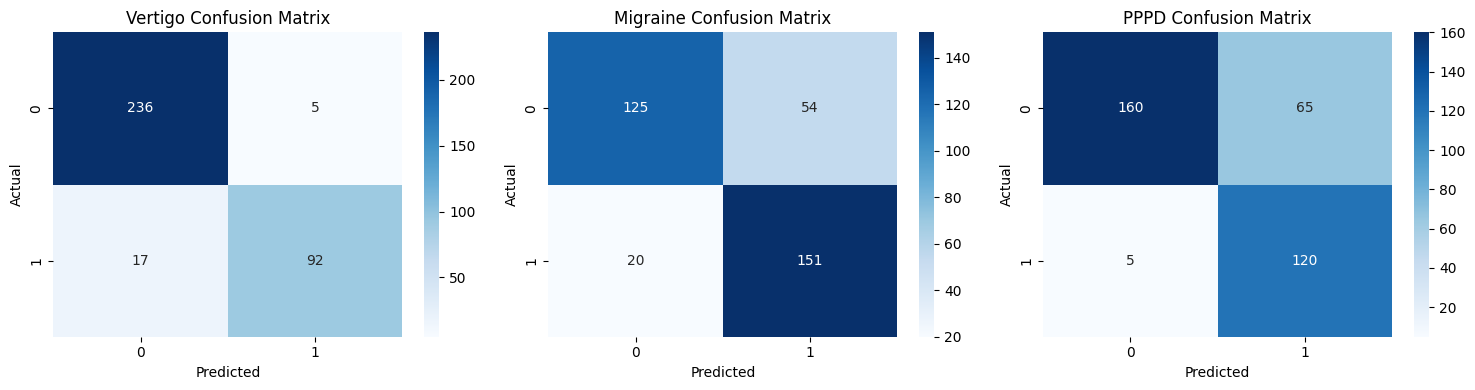

In [10]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

labels = ['Vertigo', 'Migraine', 'PPPD']
cm = multilabel_confusion_matrix(y_test, y_pred)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, label in enumerate(labels):
    sns.heatmap(cm[i], annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{label} Confusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()


In [11]:
# After model.predict()
probs = model.predict(X_test)

# Try different thresholds per label
thresholds = [0.45, 0.5, 0.6]  # [Vertigo, Migraine, PPPD]
y_pred_opt = (probs > thresholds).astype(int)

# Re-evaluate
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_opt, target_names=['Vertigo', 'Migraine', 'PPPD'], zero_division=0))


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

     Vertigo       0.31      1.00      0.48       109
    Migraine       0.47      0.43      0.45       171
        PPPD       0.00      0.00      0.00       125

   micro avg       0.36      0.45      0.40       405
   macro avg       0.26      0.48      0.31       405
weighted avg       0.28      0.45      0.32       405
 samples avg       0.32      0.33      0.30       405



In [13]:
probs = model.predict(X_test)

# Tune thresholds per label (example starting point)
thresholds = [0.45, 0.5, 0.55]
y_pred_opt = (probs > thresholds).astype(int)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [14]:
print(classification_report(y_test, y_pred_opt, target_names=['Vertigo', 'Migraine', 'PPPD'], zero_division=0))


              precision    recall  f1-score   support

     Vertigo       0.31      1.00      0.48       109
    Migraine       0.47      0.43      0.45       171
        PPPD       0.11      0.02      0.03       125

   micro avg       0.35      0.46      0.40       405
   macro avg       0.30      0.48      0.32       405
weighted avg       0.32      0.46      0.33       405
 samples avg       0.32      0.33      0.30       405



In [15]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)


In [16]:
from tensorflow.keras.layers import BatchNormalization

model = tf.keras.Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(3, activation='sigmoid')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


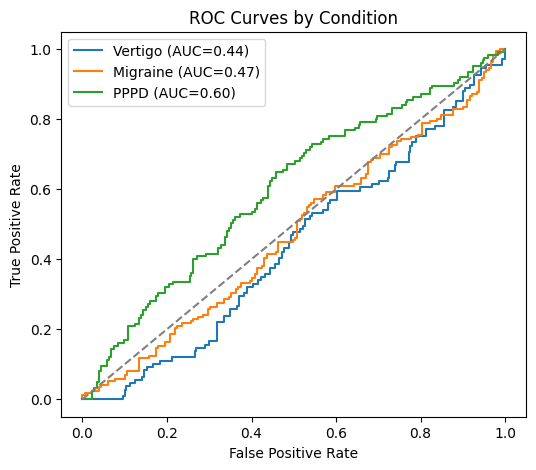

In [17]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

probs = model.predict(X_test)
plt.figure(figsize=(6,5))
for i, label in enumerate(['Vertigo', 'Migraine', 'PPPD']):
    fpr, tpr, _ = roc_curve(y_test.iloc[:, i], probs[:, i])
    plt.plot(fpr, tpr, label=f'{label} (AUC={auc(fpr,tpr):.2f})')
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('ROC Curves by Condition')
plt.legend(); plt.show()


In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [19]:
probs = model.predict(X_test)
# use probs directly for roc_curve()


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [20]:
probs = model.predict(X_test)
print("Mean predicted probabilities:")
for i, label in enumerate(['Vertigo', 'Migraine', 'PPPD']):
    print(f"{label}: {probs[:, i].mean():.3f} ± {probs[:, i].std():.3f}")


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean predicted probabilities:
Vertigo: 0.587 ± 0.030
Migraine: 0.541 ± 0.032
PPPD: 0.503 ± 0.036


In [21]:
import pandas as pd
import numpy as np

# 🔧 Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n = 3500

# ================================
# Step 1️⃣: Generate base features
# ================================
age = np.random.randint(18, 80, n)
gender = np.random.choice([0, 1], n)  # 0=female, 1=male
duration = np.random.uniform(0, 10, n)
frequency = np.random.randint(1, 10, n)
intensity = np.random.uniform(0, 10, n)
nausea = np.random.choice([0, 1], n, p=[0.6, 0.4])
vomiting = np.random.choice([0, 1], n, p=[0.7, 0.3])
dizziness = np.random.choice([0, 1], n, p=[0.5, 0.5])
headache = np.random.choice([0, 1], n, p=[0.6, 0.4])
photophobia = np.random.choice([0, 1], n, p=[0.7, 0.3])
phonophobia = np.random.choice([0, 1], n, p=[0.7, 0.3])
visual = np.random.choice([0, 1], n, p=[0.8, 0.2])
sensory = np.random.choice([0, 1], n, p=[0.85, 0.15])

# ======================================
# Step 2️⃣: Generate correlated conditions
# ======================================

# Migraine: heavily linked to headache + photophobia + phonophobia
migraine = (0.6 * headache + 0.4 * photophobia + 0.3 * phonophobia + np.random.rand(n)*0.2) > 0.7

# Vertigo: linked to dizziness + nausea + vomiting
vertigo = (0.7 * dizziness + 0.3 * nausea + 0.2 * vomiting + np.random.rand(n)*0.2) > 0.6

# PPPD: linked to long duration dizziness, nausea, and lower intensity events
pppd = (0.5 * dizziness + 0.5 * (duration / 10) + 0.3 * nausea + np.random.rand(n)*0.2) > 0.65

# Convert to integers (0/1)
migraine = migraine.astype(int)
vertigo = vertigo.astype(int)
pppd = pppd.astype(int)

# ======================================
# Step 3️⃣: Combine into final dataframe
# ======================================
data = pd.DataFrame({
    "age": age,
    "gender": gender,
    "duration": duration,
    "frequency": frequency,
    "intensity": intensity,
    "nausea": nausea,
    "vomiting": vomiting,
    "dizziness": dizziness,
    "headache": headache,
    "photophobia": photophobia,
    "phonophobia": phonophobia,
    "visual": visual,
    "sensory": sensory,
    "migraine": migraine,
    "vertigo": vertigo,
    "pppd": pppd
})

# ✅ Save file
file_path = "/content/pppd_vertigo_migraine_improved.csv"
data.to_csv(file_path, index=False)
print(f"✅ Dataset generated and saved to: {file_path}")
print(f"Shape: {data.shape}")
data.head()


✅ Dataset generated and saved to: /content/pppd_vertigo_migraine_improved.csv
Shape: (3500, 16)


,age,gender,duration,frequency,intensity,nausea,vomiting,dizziness,headache,photophobia,phonophobia,visual,sensory,migraine,vertigo,pppd
0,56,0,7.805560,3,8.511108,0,0,0,1,1,0,0,0,1,0,0
1,69,1,3.036239,7,4.274044,0,0,1,1,0,0,0,0,0,1,1
2,46,1,3.116898,9,9.619777,1,1,0,1,0,0,0,0,1,0,1
3,32,0,0.031409,6,7.229010,0,0,0,1,1,1,0,0,1,0,0
4,60,1,1.742434,2,6.445632,1,0,1,1,1,0,0,0,1,1,1


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4768 - auc: 0.7478 - loss: 0.5994 - val_accuracy: 0.5086 - val_auc: 0.9726 - val_loss: 0.4505 - learning_rate: 5.0000e-04
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6175 - auc: 0.9667 - loss: 0.2407 - val_accuracy: 0.4714 - val_auc: 0.9810 - val_loss: 0.2957 - learning_rate: 5.0000e-04
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6164 - auc: 0.9781 - loss: 0.1931 - val_accuracy: 0.5886 - val_auc: 0.9880 - val_loss: 0.2015 - learning_rate: 5.0000e-04
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6482 - auc: 0.9841 - loss: 0.1644 - val_accuracy: 0.6086 - val_auc: 0.9897 - val_loss: 0.1497 - learning_rate: 5.0000e-04
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6543 - auc: 0.9847 - loss: 0.1592 - val_accuracy: 0.6486 - val_auc: 0.9907 - val_loss: 0.1283 - learning_rate: 5.0000e-04
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6606 - auc: 0.98

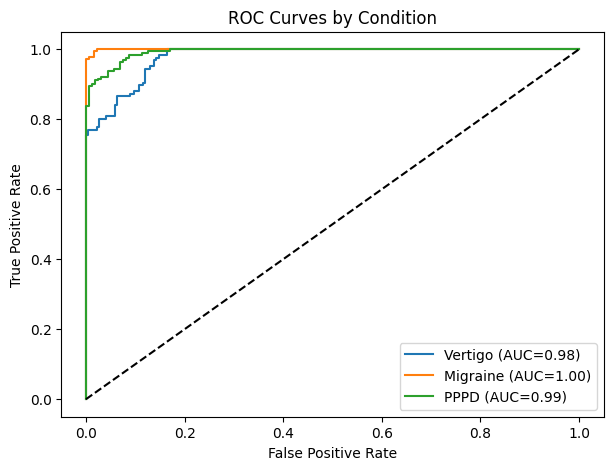

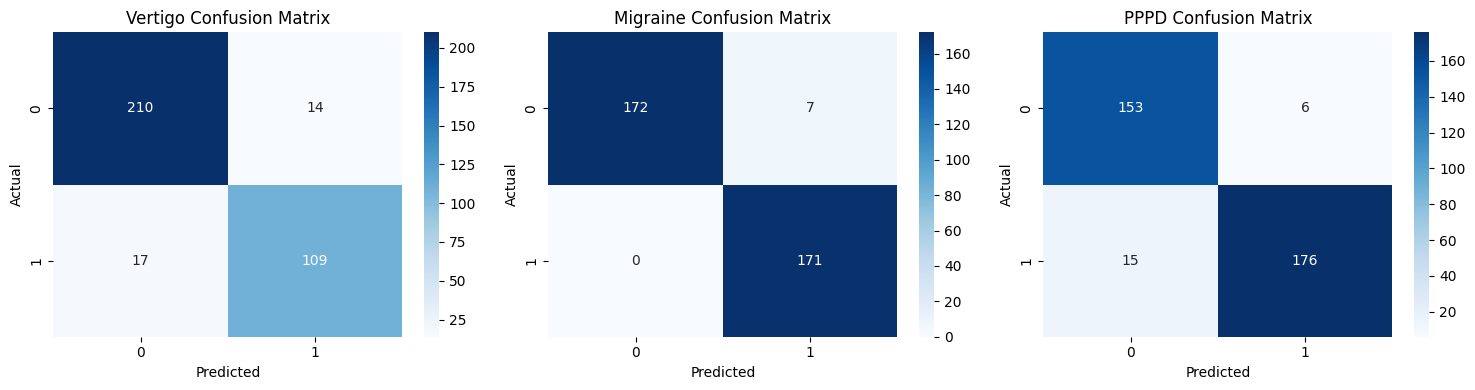


=== Overall Performance Metrics ===
F1 Score: 0.9438
Precision: 0.9438
Recall: 0.9438
Accuracy: 0.9438


In [22]:
# =====================================
# 1️⃣ Import libraries
# =====================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, auc, multilabel_confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns

# =====================================
# 2️⃣ Load and prepare dataset
# =====================================
file_path = "/content/pppd_vertigo_migraine_improved.csv"
data = pd.read_csv(file_path)

X = data.iloc[:, :-3]
y = data.iloc[:, -3:]

# Split into train/val/test (70/20/10)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)

# Scale only on training data (no leakage)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# =====================================
# 3️⃣ Define model
# =====================================
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(3, activation='sigmoid')  # 3 outputs for multi-label classification
])

# =====================================
# 4️⃣ Compile and train
# =====================================
model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

es = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[es, lr],
    verbose=1
)

# =====================================
# 5️⃣ Evaluate model
# =====================================
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=['Vertigo', 'Migraine', 'PPPD'], zero_division=0))

# =====================================
# 6️⃣ ROC Curves per Condition
# =====================================
plt.figure(figsize=(7,5))
for i, label in enumerate(['Vertigo', 'Migraine', 'PPPD']):
    fpr, tpr, _ = roc_curve(y_test.iloc[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{label} (AUC={roc_auc:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves by Condition")
plt.legend()
plt.show()

# =====================================
# 7️⃣ Confusion Matrices
# =====================================
labels = ['Vertigo', 'Migraine', 'PPPD']
cm = multilabel_confusion_matrix(y_test, y_pred)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, label in enumerate(labels):
    sns.heatmap(cm[i], annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{label} Confusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')
plt.tight_layout()
plt.show()

# =====================================
# 8️⃣ Metric summary (F1, Precision, Recall, Accuracy)
# =====================================
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

y_true_flat = y_test.values.flatten()
y_pred_flat = y_pred.flatten()

f1 = f1_score(y_true_flat, y_pred_flat, average='weighted')
precision = precision_score(y_true_flat, y_pred_flat, average='weighted')
recall = recall_score(y_true_flat, y_pred_flat, average='weighted')
accuracy = accuracy_score(y_true_flat, y_pred_flat)

print("\n=== Overall Performance Metrics ===")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Accuracy: {accuracy:.4f}")


In [23]:
import numpy as np

def predict_user_input():
    print("🧠 Vertigo / Migraine / PPPD Diagnostic Predictor")
    print("==================================================")
    print("Please enter your details and symptoms below.")
    print("Press Enter to use default values (shown in brackets).")
    print("--------------------------------------------------\n")
    print("💡 Example: If you are a 45-year-old woman with dizziness and headaches")
    print("that have lasted a long time, you might enter:")
    print("    Age: 45")
    print("    Gender: 0 (female)")
    print("    Duration: 8 (long duration)")
    print("    Frequency: 6 (frequent episodes)")
    print("    Intensity: 7 (moderate intensity)")
    print("    Nausea: 1 (yes)")
    print("    Vomiting: 0 (no)")
    print("    Dizziness: 1 (yes)")
    print("    Headache: 1 (yes)")
    print("    Photophobia: 0 (no)")
    print("    Phonophobia: 0 (no)")
    print("    Visual disturbance: 0 (no)")
    print("    Sensory symptoms: 0 (no)\n")
    print("--------------------------------------------------\n")

    try:
        # Collect user input
        age = float(input("Age (years, e.g., 25–80) [default=35]: ") or 35)
        gender = int(input("Gender (0 = Female, 1 = Male) [default=0]: ") or 0)
        duration = float(input("Duration of symptoms (0–10, where 10 = very long-lasting) [default=5]: ") or 5)
        frequency = float(input("Frequency of episodes (1–10, where 10 = very frequent) [default=5]: ") or 5)
        intensity = float(input("Intensity (0–10, where 10 = very severe) [default=5]: ") or 5)
        nausea = int(input("Nausea present? (1 = Yes, 0 = No) [default=0]: ") or 0)
        vomiting = int(input("Vomiting present? (1 = Yes, 0 = No) [default=0]: ") or 0)
        dizziness = int(input("Dizziness present? (1 = Yes, 0 = No) [default=1]: ") or 1)
        headache = int(input("Headache present? (1 = Yes, 0 = No) [default=0]: ") or 0)
        photophobia = int(input("Light sensitivity (Photophobia) (1 = Yes, 0 = No) [default=0]: ") or 0)
        phonophobia = int(input("Sound sensitivity (Phonophobia) (1 = Yes, 0 = No) [default=0]: ") or 0)
        visual = int(input("Visual disturbances (1 = Yes, 0 = No) [default=0]: ") or 0)
        sensory = int(input("Sensory symptoms like tingling (1 = Yes, 0 = No) [default=0]: ") or 0)

        # Combine into feature array
        features = np.array([[age, gender, duration, frequency, intensity,
                              nausea, vomiting, dizziness, headache,
                              photophobia, phonophobia, visual, sensory]])

        # Scale using training scaler
        features_scaled = scaler.transform(features)

        # Predict
        preds = model.predict(features_scaled)[0]

        # Convert probabilities to percentages
        preds_percent = preds * 100
        conditions = ['Vertigo', 'Migraine', 'PPPD']

        print("\n🔍 Predicted Probabilities:")
        for cond, prob in zip(conditions, preds_percent):
            print(f"{cond}: {prob:.2f}% likelihood")

        # Interpretation based on 50% threshold
        threshold = 50
        likely = [conditions[i] for i, p in enumerate(preds_percent) if p >= threshold]
        print("\n✅ Summary Diagnosis:")
        if likely:
            print("User shows a high likelihood of:")
            for c in likely:
                print(f"• {c}")
        else:
            print("No strong indication of Vertigo, Migraine, or PPPD (all below 50%).")

    except Exception as e:
        print(f"⚠️ Input error: {e}")

# Run predictor
predict_user_input()


🧠 Vertigo / Migraine / PPPD Diagnostic Predictor
Please enter your details and symptoms below.
Press Enter to use default values (shown in brackets).
--------------------------------------------------

💡 Example: If you are a 45-year-old woman with dizziness and headaches
that have lasted a long time, you might enter:
    Age: 45
    Gender: 0 (female)
    Duration: 8 (long duration)
    Frequency: 6 (frequent episodes)
    Intensity: 7 (moderate intensity)
    Nausea: 1 (yes)
    Vomiting: 0 (no)
    Dizziness: 1 (yes)
    Headache: 1 (yes)
    Photophobia: 0 (no)
    Phonophobia: 0 (no)
    Visual disturbance: 0 (no)
    Sensory symptoms: 0 (no)

--------------------------------------------------

Age (years, e.g., 25–80) [default=35]: 44
Gender (0 = Female, 1 = Male) [default=0]: 0
Duration of symptoms (0–10, where 10 = very long-lasting) [default=5]: 4
Frequency of episodes (1–10, where 10 = very frequent) [default=5]: 4
Intensity (0–10, where 10 = very severe) [default=5]: 5
Nause

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [24]:
# Save trained model in HDF5 (.h5) format
model.save("/content/pppd_vertigo_migraine_model.h5")
print("✅ Model successfully saved as 'pppd_vertigo_migraine_model.h5'")


✅ Model successfully saved as 'pppd_vertigo_migraine_model.h5'


In [25]:
!pip install streamlit pyngrok tensorflow joblib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 77.3 MB/s eta 0:00:00


In [36]:
from pyngrok import conf
conf.get_default().auth_token = "35CJxXSPRKSKvmMAMmCWaJLQgd4_4YA8TCdWPWDSojG8vhzpb"
print("✅ ngrok token saved successfully!")


✅ ngrok token saved successfully!


In [53]:
from pyngrok import ngrok
import threading, time, subprocess

ngrok.kill()

def run_streamlit():
    subprocess.call(["streamlit", "run", "app.py", "--server.port", "8501"])

thread = threading.Thread(target=run_streamlit, daemon=True)
thread.start()

time.sleep(5)
public_url = ngrok.connect(8501)
print("🌍 Your Streamlit app is live here:", public_url)


🌍 Your Streamlit app is live here: NgrokTunnel: "https://lavada-baccivorous-angelia.ngrok-free.dev" -> "http://localhost:8501"
